https://neurohive.io/ru/osnovy-data-science/razbor-resheniya-zadachi-titanik-na-kaggle-dlya-nachinajushhih/  
https://github.com/sumitmukhija/Titanic/blob/master/Tip%20of%20the%20Iceberg.ipynb  
https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83/notebook  
https://github.com/ramansah/kaggle-titanic/blob/master/Analysis.ipynb  
https://www.kaggle.com/startupsci/titanic-data-science-solutions  
https://www.kaggle.com/makarevich/missing-values-that-you-can-t-miss-in-titanic  
https://www.kaggle.com/vradore/titanic-survival-analysis-with-missing-values  
https://www.kaggle.com/c/titanic/discussion/62321  
https://www.kaggle.com/jack89roberts/titanic-using-ticket-groupings  
http://rstudio-pubs-static.s3.amazonaws.com/227239_a42941af5d7d457398ed3721f9ad0f6f.html  
https://www.encyclopedia-titanica.org/titanic-victims/  
https://www.kaggle.com/amypeniston/titanic-simple-gender-family-group-model  

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [237]:
# train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('my_test.csv')
# df = pd.concat([train_data, test_data])
df = pd.read_csv('train.csv')
# X, y = df.drop('Survived', axis=1), df['Survived']
X, y = df, df['Survived']
X['Family'] = X['SibSp'] + X['Parch']
X['Female'] = (X['Sex'] == 'female').astype(int)
X['Title'] = X['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
X['Age'] = X.groupby(['Title'])['Age'].transform(lambda g: g.fillna(g.median()))
X['Fare'] = X['Fare'].fillna(X['Fare'].median())
X['Fare'] = X.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
X['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
X['Boy'] = ((X['Age'] < 14) & (X['Sex'] == 'male')).astype(int)
X['Group'] = X['Pclass'].astype(str) + X['Embarked'] + X['Fare'].astype(str)
# X['Group'] = LabelEncoder().fit_transform(X['Group'])
# X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])
X['Age'] = pd.cut(X['Age'], bins=[0,9,20,30,100])
#X['Age'] = LabelEncoder().fit_transform(X['Age'])
#X['Family'] = pd.cut(X['Family'], bins=[0,1,6,20])
#X['Family'] = LabelEncoder().fit_transform(X['Family'])
X['Fare'] = pd.cut(X['Fare'], bins=[0,10,20,30,100])
#X['Fare'] = LabelEncoder().fit_transform(X['Fare'])
X = X.drop(['PassengerId','Name','Title','Cabin','SibSp','Parch','Sex','Ticket','Name'], axis=1)
X

,Survived,Pclass,Age,Fare,Embarked,Family,Female,Boy,Group
0,0,3,"(20, 30]","(0, 10]",S,1,0,0,3S7.25
1,1,1,"(30, 100]","(30, 100]",C,1,1,0,1C71.2833
2,1,3,"(20, 30]","(0, 10]",S,0,1,0,3S7.925
3,1,1,"(30, 100]","(20, 30]",S,1,1,0,1S26.55
4,0,3,"(30, 100]","(0, 10]",S,0,0,0,3S8.05
...,...,...,...,...,...,...,...,...,...
886,0,2,"(20, 30]","(10, 20]",S,0,0,0,2S13.0
887,1,1,"(9, 20]","(20, 30]",S,0,1,0,1S30.0
888,0,3,"(20, 30]","(10, 20]",S,3,1,0,3S11.725
889,1,1,"(20, 30]","(20, 30]",C,0,0,0,1C30.0


In [191]:
X.loc[y == 0, 'Pclass'], y[y == 0]

(0      3
 4      3
 5      3
 6      1
 7      3
       ..
 884    3
 885    3
 886    2
 888    3
 890    3
 Name: Pclass, Length: 549, dtype: int64,
 0      0
 4      0
 5      0
 6      0
 7      0
       ..
 884    0
 885    0
 886    0
 888    0
 890    0
 Name: Survived, Length: 549, dtype: int64)

<AxesSubplot:>

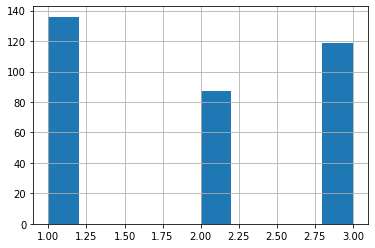

In [193]:
X.loc[y == 1, 'Pclass'].hist()

In [195]:
((X['Pclass'] == 1) & (y == 1)).sum() / (X['Pclass'] == 1).sum()

0.6296296296296297

In [198]:
((X['Pclass'] == 2) & (y == 1)).sum() / (X['Pclass'] == 2).sum()

0.47282608695652173

In [199]:
((X['Pclass'] == 3) & (y == 1)).sum() / (X['Pclass'] == 3).sum()

0.24236252545824846

In [200]:
((X['Female'] == 1) & (y == 1)).sum() / (X['Female'] == 1).sum()

0.7420382165605095

In [201]:
((X['Female'] == 0) & (y == 1)).sum() / (X['Female'] == 0).sum()

0.18890814558058924

In [204]:
(X['Female'] == 1).sum() / (X['Female'] == 0).sum()

0.5441941074523396

In [209]:
((X['Boy'] == 1) & (y == 1)).sum() / (X['Boy'] == 1).sum()

0.5609756097560976

In [211]:
X.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [214]:
X.groupby('Age')['Survived'].mean()

Age
(0, 9]       0.606061
(9, 20]      0.376068
(20, 30]     0.311688
(30, 100]    0.427245
Name: Survived, dtype: float64

In [242]:
X.groupby('Fare')['Survived'].mean()

Fare
(0, 10]      0.256356
(10, 20]     0.413793
(20, 30]     0.647059
(30, 100]    0.638655
Name: Survived, dtype: float64

In [241]:
X.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [240]:
X.groupby('Group')['Survived'].mean().to_dict()

{'1C123.7604': 0.5,
 '1C131.1875': 1.0,
 '1C15.5': 1.0,
 '1C170.7764': 1.0,
 '1C211.5': 0.0,
 '1C25.576400000000003': 1.0,
 '1C26.55': 1.0,
 '1C27.7208': 0.25,
 '1C27.720825': 0.75,
 '1C27.75': 0.0,
 '1C28.4646': 1.0,
 '1C28.7125': 0.0,
 '1C28.9896': 1.0,
 '1C29.7': 0.3333333333333333,
 '1C30.0': 1.0,
 '1C30.5': 1.0,
 '1C30.6958': 0.0,
 '1C31.0': 1.0,
 '1C34.65': 1.0,
 '1C34.6542': 0.0,
 '1C35.5': 1.0,
 '1C37.75833333333333': 0.6666666666666666,
 '1C39.13335': 1.0,
 '1C39.6': 0.25,
 '1C40.125': 0.0,
 '1C41.0854': 0.5,
 '1C41.57915': 1.0,
 '1C44.5521': 1.0,
 '1C45.211099999999995': 0.5,
 '1C45.5396': 1.0,
 '1C49.5': 1.0,
 '1C49.5042': 0.5,
 '1C53.2125': 0.5,
 '1C54.45': 0.5,
 '1C55.4417': 1.0,
 '1C56.88125': 0.75,
 '1C59.4': 1.0,
 '1C61.3792': 0.0,
 '1C61.9792': 0.0,
 '1C63.3583': 1.0,
 '1C67.25': 1.0,
 '1C71.2833': 1.0,
 '1C73.2604': 1.0,
 '1C75.25': 1.0,
 '1C76.2917': 1.0,
 '1C79.2': 1.0,
 '1C83.1583': 1.0,
 '1Q45.0': 0.5,
 '1S0.0': 0.0,
 '1S15.5': 0.0,
 '1S221.7792': 0.0,
 '1S25.5875

In [244]:
X.groupby('Boy')['Survived'].mean()

Boy
0    0.375294
1    0.560976
Name: Survived, dtype: float64

In [245]:
X.groupby('Female')['Survived'].mean()

Female
0    0.188908
1    0.742038
Name: Survived, dtype: float64

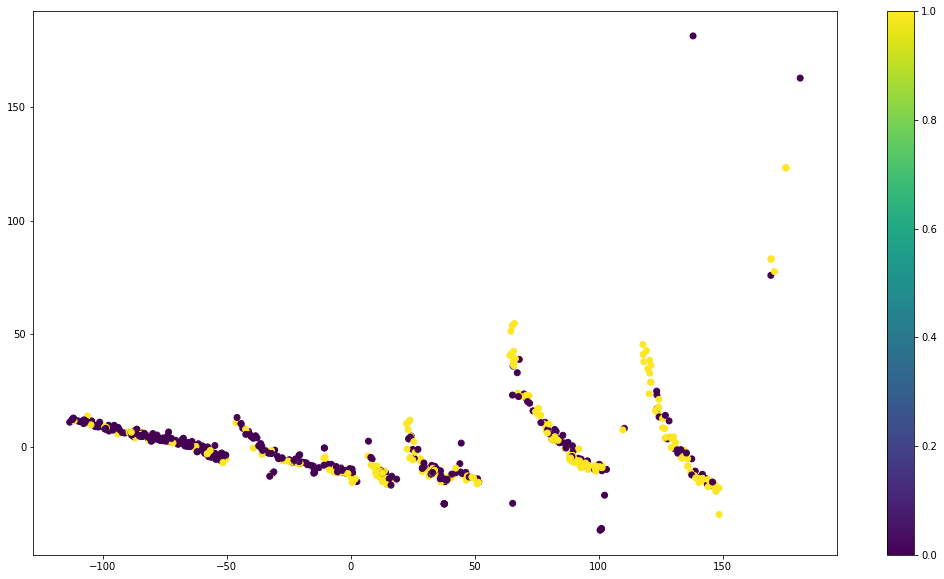

In [173]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.figure(figsize=(18,10))
plt.scatter(X2[:,0], X2[:,1], c=y) # c=X['Age'], c=y
plt.colorbar()

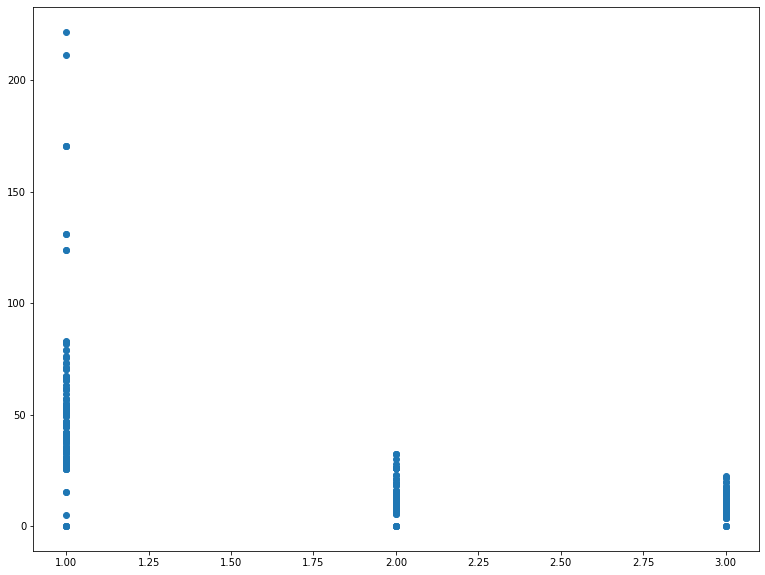

In [122]:
plt.figure(figsize=(13,10))
plt.scatter(X['Pclass'], X['Fare'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


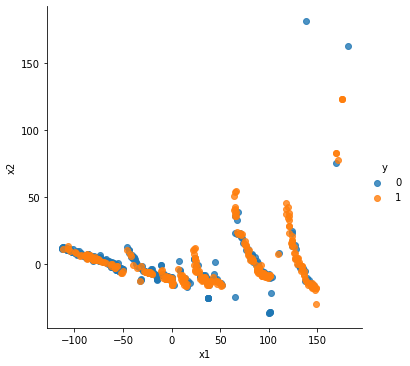

In [178]:
data = pd.DataFrame({'x1':X2[:,0], 'x2':X2[:,1], 'y':y}) # X['Pclass']
sns.lmplot('x1', 'x2', data=data, hue='y', fit_reg=False)

/home/vaaliferov/.local/lib/python3.9/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


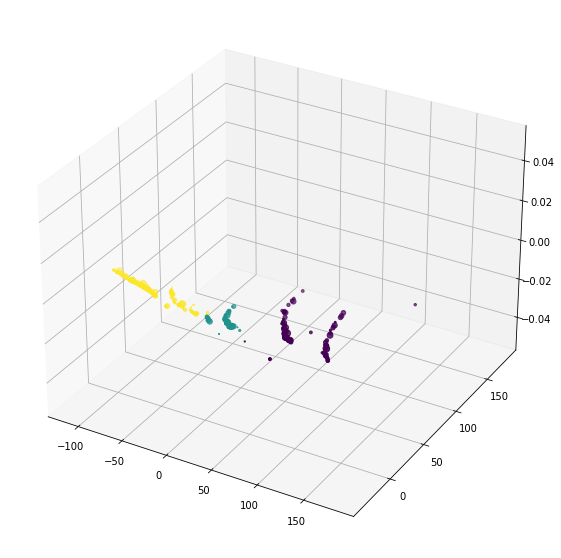

In [181]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
X3 = pca.fit_transform(X)
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X3[:,0], X3[:,1], X3[:,2], c=X['Pclass'])

In [ ]:
import numpy as np
import pandas as pd
X = pd.read_csv('train.csv')
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])
X['Fare'] = X.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
X['Group'] = X['Pclass'].astype(str) + X['Ticket'].str[:-1] + X['Embarked'] + X['Fare'].astype(str)
X['Group'] = X.groupby('Group')['Group'].transform(lambda x: '-' if len(x) < 2 else x)
# X.loc[(X['Sex'] == 'male') & (X['Age'] >= 14), 'Group'] = '-'
X['Family'] = X['SibSp'] + X['Parch']

# X['Rate'] = X.groupby('Group')['Survived'].transform(lambda g: g.mean())
# group_survive_rate = X[['Group','Rate']].drop_duplicates().set_index('Group')['Rate'].to_dict()
# X['Rate2'] = X['Group'].apply(lambda x: group_survive_rate[x])
# X.sort_values(by='Group').drop(['PassengerId','Ticket'], axis=1)
# X.loc[X['Sex'] == 'male', 'Sex'] = '---'

X['Group'].isnull().sum()

In [ ]:
# X_train.columns.values
# X_train.shape

In [ ]:
# pd.set_option('display.max_rows', 500)
test_data[y_test != m.predict(X_test)].sort_values(by='Survived')

In [ ]:
from sklearn.model_selection import GridSearchCV
m = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2'],'solver': ['liblinear']}
cv = GridSearchCV(m, grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_train)
cv.best_estimator_, cv.best_score_

In [ ]:
# X_train.columns.values[np.argsort(np.abs(m.coef_[0]))].tolist()
sorted(zip(X_train.columns.values, np.abs(m.coef_[0])), key=lambda x: x[1], reverse=True)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(X_train.columns.values, m.coef_[0]);

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('my_test.csv') #@!
train_len = len(train_data)

df = pd.concat([train_data, test_data])
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
df['Last_Name'] = df['Name'].str.split(",").str.get(0)
df['Age'] = df.groupby(['Title'])['Age'].transform(lambda g: g.fillna(g.median()))
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Fare'] = df.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Ticket'] = df.groupby('Ticket')['Ticket'].transform(lambda x: '< 3' if len(x) < 3 else x)
df = df.drop(['PassengerId','Name','Title','Last_Name','Cabin','SibSp','Parch'], axis=1)

df['Fare'] = pd.cut(df['Fare'], bins=[0,10,20,30,100])
df['Age'] = pd.cut(df['Age'], bins=[0,8,14,31,100])
df = pd.get_dummies(df, columns=['Pclass','Sex','Age','Embarked','Fare','Ticket'])

y_train = df[:train_len]['Survived']
y_test = df[train_len:]['Survived'] #@!
X_train = df[:train_len].drop(['Survived'], axis=1)
X_test = df[train_len:].drop(['Survived'], axis=1)

m = LogisticRegression()
# m = KNeighborsClassifier(n_neighbors=3, weights='distance')
# m = RandomForestClassifier()
m.fit(X_train, y_train)

out = pd.DataFrame()
out['PassengerId'] = test_data.PassengerId
out['Survived'] = m.predict(X_test)
out.to_csv('my_submission.csv', index=False)

# cross_val_score(m, X_train, y_train, scoring='accuracy', cv=3).mean()
accuracy_score(y_test, m.predict(X_test)) #@!

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('my_test.csv') #@!
train_len = len(train_data)

df = pd.concat([train_data, test_data])
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
df['Last_Name'] = df['Name'].str.split(",").str.get(0)
df['Age'] = df.groupby(['Title'])['Age'].transform(lambda g: g.fillna(g.median()))
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Fare'] = df.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# df['Ticket'] = df.groupby('Ticket')['Ticket'].transform(lambda x: '< 3' if len(x) < 3 else x)
df = df.drop(['PassengerId','Name','Title','Last_Name','Cabin','SibSp','Parch'], axis=1)

df['Fare'] = pd.cut(df['Fare'], bins=[0,10,20,30,100])
df['Age'] = pd.cut(df['Age'], bins=[0,8,15,30,100]) #[0,7.90,14.45,31.28,120]
# df = pd.get_dummies(df, columns=['Pclass','Sex','Age','Embarked','Fare','Ticket'])
# df['Ticket'].unique()

In [ ]:
def extract_survive_rate(data):
    X = data.copy()
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])
    X['Fare'] = X.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
    X['Group'] = X['Pclass'].astype(str) + X['Ticket'].str[:-1] + X['Embarked'] + X['Fare'].astype(str)
    X['Group'] = X.groupby('Group')['Group'].transform(lambda x: '-' if len(x) < 2 else x)
    X['Rate'] = X.groupby('Group')['Survived'].transform(lambda g: g.mean() if len(g) > 1 else 0.5)
    return X[['Group','Rate']].drop_duplicates().set_index('Group')['Rate'].to_dict()

X['Rate'] = X['Group'].apply(lambda x: rate.get(x, 0.5))

rate = extract_survive_rate(train_data)
X_train = extract_features(train_data, rate)
X_test = extract_features(test_data, rate)
X_train, X_test = align_features(X_train, X_test)

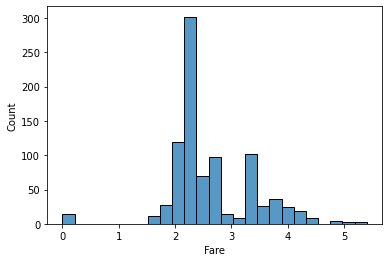

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
train_data = pd.read_csv('train.csv')
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
train_data['Fare'] = train_data.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
sns.histplot(np.log1p(train_data['Fare']));

In [ ]:
from sklearn.model_selection import GridSearchCV
m = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2'],'solver': ['liblinear']}
cv = GridSearchCV(m, grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_train)
cv.best_estimator_, cv.best_score_

In [ ]:
# scaler, scaled = MinMaxScaler(), ['SibSp','Parch']
# X_train[scaled] = scaler.fit_transform(X_train[scaled])
# X_test[scaled] = scaler.transform(X_test[scaled])

In [ ]:
# label = LabelEncoder()
# df['Fare'] = label.fit_transform(df['Fare'])
# df['Sex'] = label.fit_transform(df['Sex'])
# df['Ticket'] = label.fit_transform(df['Ticket'])
# df['Age'] = label.fit_transform(df['Age'])
# df['Embarked'] = label.fit_transform(df['Embarked'])

In [ ]:
import numpy as np
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_len = len(train_data)
df = pd.concat([train_data, test_data])
df['Ticket'] = df.groupby(['Ticket']).ngroup()
df['Ticket'] = df.groupby('Ticket')['Ticket'].transform(lambda x: -1 if len(x) < 3 else x)
df.sort_values(by='Ticket')
len(df['Ticket'].unique())

In [ ]:
import numpy as np
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_len = len(train_data)
df = pd.concat([train_data, test_data])
df['Last_Name'] = df['Name'].str.split(",").str.get(0)
df['Family'] = df.groupby(['Ticket','Last_Name']).ngroup()
df['Family'] = df.groupby('Family')['Family'].transform(lambda x: -1 if len(x) < 3 else x)
df.sort_values(by='Family')
len(df['Family'].unique())

In [ ]:
import numpy as np
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_len = len(train_data)
df = pd.concat([train_data, test_data])
df['Ticket'] = df.groupby('Ticket')['Ticket'].transform(lambda x: '< 3' if len(x) < 3 else x)
df.sort_values(by='Ticket')
len(df['Ticket'].unique())

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
df = pd.concat([train_data, test_data])

for name, group in df.groupby(['Ticket']):
    if len(group) > 1: 
        print(group[['Cabin','Ticket','Survived']])
        print(len(group))

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_len = len(train_data)
df = pd.concat([train_data, test_data])
df['Last_Name'] = df['Name'].str.split(",").str.get(0)

for name, group in df.groupby(['Ticket','Last_Name']):
    if len(group) > 1: 
        print(group[['Last_Name','Cabin','Ticket','Survived']])
        print(len(group))

In [ ]:
train_data['Ticket'].isnull().sum()

In [ ]:
# df['Family'] = df['SibSp'] + df['Parch']
# df['Alone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)
# df['Cabin'] = df['Cabin'].fillna('NA')
# df['Family'] = df.groupby(['Ticket','Last_Name']).ngroup()
# df['Family'] = df.groupby('Family')['Family'].transform(lambda x: -1 if len(x) < 3 else x)
# df['Ticket'] = df.groupby(['Ticket']).ngroup()
# df['Ticket'] = df.groupby('Ticket')['Ticket'].transform(lambda x: -1 if len(x) < 3 else x)

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_len = len(train_data)
df = pd.concat([train_data, test_data])
df['Last_Name'] = df['Name'].str.split(",").str.get(0)

for name, group in df.groupby(['Pclass','Last_Name']):
    if len(group) > 9: 
        print(group[['Last_Name','Cabin','Ticket']])
        print(len(group))

In [ ]:
one_hot_encoded = ['Pclass','Sex','Age','SibSp','Parch','Cabin','Embarked','Fare','Alone']
X_train = pd.get_dummies(X_train, columns=one_hot_encoded)
X_test = pd.get_dummies(X_test, columns=one_hot_encoded)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [17]:
import pandas as pd
df1 = pd.read_csv('titanic.csv')
df2 = pd.read_csv('test.csv')
df1 = df1.drop(['Boat','Body','Home.dest'], axis=1)
df = pd.concat([df1, df2])
df = df[df.duplicated(['Name'], keep=False)]
df = df.sort_values(by='Name')
df = df[df['Survived'].notnull()]
df.to_csv('my_test.csv', index=False)

In [ ]:
df1 = pd.read_csv('titanic.csv')
df2 = pd.read_csv('train.csv')
df3 = pd.read_csv('test.csv')
df4 = pd.concat([df1,df2]).drop_duplicates(subset='Name', keep="last")
df1.shape, df2.shape, df3.shape, df4.shape

In [ ]:
from sklearn.model_selection import GridSearchCV
m = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2'],'solver': ['liblinear']}
cv = GridSearchCV(m, grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_train)
cv.best_estimator_, cv.best_score_

In [ ]:
train_data['Name'].str.contains('Don').sum()

In [ ]:
(train_data['Fare'] / (train_data['SibSp'] + train_data['Parch'] + 1) < 1).sum()

In [ ]:
train_data['Pclass'].isnull().sum()

In [ ]:
train_data.groupby('Sex').apply(lambda x: x['Survived'].sum() / len(x))

In [ ]:
train_data.Survived[train_data['Sex'] == 'male'].value_counts().plot(kind='pie')

In [ ]:
train_data.Survived[train_data['Sex'] == 'female'].value_counts().plot(kind='pie')

In [ ]:
train_data.loc[train_data['Sex'] == 'male', 'Survived'].mean()
train_data.loc[train_data['Sex'] == 'female', 'Survived'].mean()

In [ ]:
train_data['Age_c'] = pd.cut(train_data['Age'], 4)
# train_data['Age_c'] = pd.cut(train_data['Age'], bins=[0,7.90,14.45,31.28,120])
s = train_data.groupby('Age_c').apply(lambda x: x['Survived'].sum() / len(x))
plt.bar(s.index.astype(str), s.values)
plt.xticks(rotation=45);

In [ ]:
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
# women[women['Survived']==0].Age.dropna().hist()
women[women['Survived']==1].Age.dropna().hist()

In [ ]:
#women = train_data[train_data['Sex']=='female']
#men = train_data[train_data['Sex']=='male']
#sns.displot(men[men['Survived']==1].Age.dropna(), bins=18)
#sns.displot(men[men['Survived']==0].Age.dropna(), bins=18)
#sns.displot(women[women['Survived']==1].Age.dropna(), bins=18)
#sns.displot(women[women['Survived']==0].Age.dropna(), bins=18)

In [ ]:
s = train_data.groupby('Sex').apply(lambda x: x['Survived'].sum() / len(x))
plt.bar(s.index.astype(str), s.values);

In [ ]:
train_data['Age_c'] = pd.cut(train_data['Age'], 5)
train_data.groupby('Age_c').apply(lambda x: x['Survived'].sum() / len(x))

In [ ]:
s = train_data.groupby('Pclass').apply(lambda x: x['Survived'].sum() / len(x))
plt.bar(s.index.astype(str), s.values);

In [ ]:
train_data['n'] = train_data.groupby('Ticket')['Fare'].transform(lambda x: len(x))
train_data['Fare1'] = train_data.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
train_data['Fare1'] = pd.cut(train_data['Fare1'], bins=[0,10,20,30,100])

In [ ]:
import matplotlib.pyplot as plt
s = train_data.groupby('Fare1').apply(lambda x: x['Survived'].sum() / len(x))
plt.bar(s.index.astype(str), s.values);
s

In [ ]:
# train_data['Age'].isnull().sum()
# train_data['Title'].isnull().sum()
# X['Age'] = X['Age'].fillna(X['Age'].mean())
train_data['Title'] = train_data['Name'].str.extract('(Mrs|Mr|Miss)').fillna('NA')
train_data['Age'] = train_data.groupby('Title').transform(lambda g: g.fillna(g.mean()))
# train_data['Age'] = train_data.groupby('Title')['Age'].apply(lambda g: g.fillna(g.median()))

In [ ]:
X = train_data
X['Title'] = X['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
# X['Title'] = X['Title'].map({'Mlle':'Miss','Major':'Mr','Col':'Mr','Sir':'Mr','Don':'Mr','Mme':'Miss','Lady':'Mrs','Jonkheer':'Mr','Capt':'Mr','Countess':'Mrs','Ms':'Miss','Dona':'Mrs'})           

X['Title'].unique()

X['Title'].replace({'Mlle':'Miss','Major':'Mr','Col':'Mr','Sir':'Mr','Don':'Mr','Mme':'Miss','Lady':'Mrs','Jonkheer':'Mr','Capt':'Mr','Countess':'Mrs','Ms':'Miss','Dona':'Mrs'})
X['Age'] = X.groupby(['Pclass','Title'])['Age'].transform(lambda g: g.fillna(g.mean()))
X['Age']

In [ ]:
X['Age'] = pd.cut(X['Age'], bins=[0,7.90,14.45,31.28,120])
X['Fare'] = pd.cut(X['Fare'], bins=[0,10,20,30,100])

pd.qcut(train_data['Fare'], 5, labels=[1,2,3,4,5]) # without one hot
pd.qcut(train_data['Age'], 4, labels=[1,2,3,4]) # without one hot
train_data['Sex'].map({'male':0,'female':1}) # without one hot

from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#train_data['Fare'] = label.fit_transform(train_data['Fare'])
#train_data['Fare']

In [ ]:
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')

train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
train_data['Title'] = train_data['Title'].replace({'Mlle':'Miss','Major':'Mr','Col':'Mr','Sir':'Mr','Don':'Mr',
       'Mme':'Miss','Lady':'Mrs','Jonkheer':'Mr','Capt':'Mr','Countess':'Mrs','Ms':'Miss','Dona':'Mrs'})

train_data['Age'] = train_data.groupby(['Pclass','Title'])['Age'].transform(lambda g: g.fillna(g.mean()))
train_data['Age'] = pd.cut(train_data['Age'], 10) # bins=[0,7.90,14.45,31.28,120]

s = train_data.groupby('Age').apply(lambda x: x['Survived'].sum() / len(x))
plt.bar(s.index.astype(str), s.values);

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

y_train = train_data['Survived'].copy()
X_train = train_data[['Pclass','Sex','SibSp','Parch','Age','Fare','Embarked','Cabin']].copy()
X_test = test_data[['Pclass','Sex','SibSp','Parch','Age','Fare','Embarked','Cabin']].copy()

X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())
X_train['Embarked'] = X_train['Fare'].fillna(X_train['Embarked'].mode()[0])
X_test['Embarked'] = X_test['Fare'].fillna(X_test['Embarked'].mode()[0])
X_train['Cabin'] = X_train['Cabin'].fillna('NA')
X_test['Cabin'] = X_test['Cabin'].fillna('NA')

X_train['Family'] = X_train['Parch'] + X_train['SibSp']
X_train['Is_Alone'] = (X_train['Family'] == 0)

X_train['Age'] = pd.cut(X_train['Age'], 80, labels=range(80))
X_test['Age'] = pd.cut(X_test['Age'], 80, labels=range(80))
X_train['Fare'] = pd.cut(X_train['Fare'], bins=[0,7.90,14.45,31.28,120], labels=range(4))
X_test['Fare'] = pd.cut(X_test['Fare'], bins=[0,7.90,14.45,31.28,120], labels=range(4))

# X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
# X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})
X_train['Sex'] = LabelEncoder().fit_transform(X_train['Sex'])
X_test['Sex'] = LabelEncoder().fit_transform(X_test['Sex'])
X_train['Embarked'] = LabelEncoder().fit_transform(X_train['Embarked'])
X_test['Embarked'] = LabelEncoder().fit_transform(X_test['Embarked'])
X_train['Cabin'] = LabelEncoder().fit_transform(X_train['Cabin'])
X_test['Cabin'] = LabelEncoder().fit_transform(X_test['Cabin'])

# scaler = StandardScaler()
# X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
# X_test[['Age']] = scaler.transform(X_test[['Age']])

# scaler = MinMaxScaler()
# X_train[['Fare']] = scaler.fit_transform(X_train[['Fare']])
# X_test[['Fare']] = scaler.transform(X_test[['Fare']])

X_train = pd.get_dummies(X_train, columns=['Pclass','Sex','SibSp','Parch','Age','Fare','Embarked','Cabin'])
X_test = pd.get_dummies(X_test, columns=['Pclass','Sex','SibSp','Parch', 'Age', 'Fare','Embarked','Cabin'])
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

lr = LogisticRegression(C=1, solver='liblinear')
lr.fit(X_train, y_train)

output = pd.DataFrame()
output['PassengerId'] = test_data.PassengerId
output['Survived'] = lr.predict(X_test)
output.to_csv('my_submission.csv', index=False)

cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=3).mean()
# accuracy_score(y_train, lr.predict(X_train))

output.shape

In [ ]:
X_test.shape

In [ ]:
lr = LogisticRegression()

grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2'],
    'solver': ['liblinear']
}

cv = GridSearchCV(lr, grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_train)
cv.best_estimator_, cv.best_score_

In [ ]:
plt.plot(train_data['Survived'], train_data['Fare'], '.')

In [ ]:
train_data['Fare'].hist()

In [ ]:
train_data.groupby('Fare')['Survived'].sum()

In [ ]:
# X_test = X_test.drop('Parch_9', axis=1)
# train_data[train_data['Age'].isnull()]
# train_data['Cabin'].unique()
# (test_data['Fare'] == 0).sum()
# X_train['Age'].mean()
# pd.cut(train_data['Age'], 5, labels=[1,2,3,4,5])
# X_train.isnull().sum()

In [ ]:
def age_category(age):
    if age < 16: return 1
    if age < 35: return 2
    return 3

# train_data['Age'].apply(age_category)

In [ ]:
'''
def age_category(age):
    if age < 18: return 1
    if age < 35: return 2
    return 3

X_train['Age'] = X_train['Age'].apply(age_category)
X_test['Age'] = X_test['Age'].apply(age_category)
'''

In [ ]:
# X_train[:5]

In [ ]:
'''
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

features = ['Pclass','Sex','SibSp','Parch']
y_train = train_data['Survived'].copy()

X_train = train_data[features].copy()
X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
X_train = pd.get_dummies(X_train, columns=features)

X_test = test_data[features].copy()
X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})
X_test = pd.get_dummies(X_test, columns=features)
X_test = X_test.drop('Parch_9', axis=1)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
output = pd.DataFrame()
output['PassengerId'] = test_data.PassengerId
output['Survived'] = knn.predict(X_test)
output.to_csv('my_submission.csv', index=False)
'''

In [ ]:
# train_data[:5]

In [ ]:
# train_data.groupby('Age').size().sort_index().plot()
# plt.plot(s.index, s.values)

In [ ]:
# train_data.groupby('Sex').size()

In [ ]:
'''
accuracy_score(y_train, knn.predict(X_train))
accuracy_score(y_train, lr.predict(X_train))
sns.pairplot(train_data, hue='Survived')
plt.scatter(x=train_data['SibSp'], y=train_data['Pclass'])
train_data['Sex'].hist()
cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=3)
confusion_matrix(y_train, lr.predict(X_train))
cat my_submission.csv
lr.coef_
X_train.isnull().sum()
X_train.info()
X_train = X_train.replace(['male','female'], [0,1])
X_train['Sex'] = X_train['Sex'].replace(['male','female'], [0,1])
X_train['Sex'] = X_train['Sex'].replace({'male':0,'female':1})
X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
X_train['Sex'] = 1 #X_train['Sex'].apply(lambda x: {'male':0,'female':1}[x])
X_train['Sex'].isnull().sum()
train_data[:5]
'''

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
'''

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

y_train = train_data['Survived'].copy()
X_train = train_data[['Pclass','Sex','SibSp','Parch','Age','Fare','Embarked','Cabin']].copy()
X_test = test_data[['Pclass','Sex','SibSp','Parch','Age','Fare','Embarked','Cabin']].copy()

X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())
X_train['Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].mode()[0])
X_test['Embarked'] = X_test['Embarked'].fillna(X_test['Embarked'].mode()[0])
X_train['Cabin'] = X_train['Cabin'].fillna('NA')
X_test['Cabin'] = X_test['Cabin'].fillna('NA')

X_train['Family'] = X_train['Parch'] + X_train['SibSp']
X_train['Is_Alone'] = (X_train['Family'] == 0)

X_train['Age'] = pd.cut(X_train['Age'], 80, labels=range(80))
X_test['Age'] = pd.cut(X_test['Age'], 80, labels=range(80))
X_train['Fare'] = pd.cut(X_train['Fare'], bins=[0,7.90,14.45,31.28,120], labels=range(4))
X_test['Fare'] = pd.cut(X_test['Fare'], bins=[0,7.90,14.45,31.28,120], labels=range(4))

# X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
# X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})
X_train['Sex'] = LabelEncoder().fit_transform(X_train['Sex'])
X_test['Sex'] = LabelEncoder().fit_transform(X_test['Sex'])
X_train['Embarked'] = LabelEncoder().fit_transform(X_train['Embarked'])
X_test['Embarked'] = LabelEncoder().fit_transform(X_test['Embarked'])
X_train['Cabin'] = LabelEncoder().fit_transform(X_train['Cabin'])
X_test['Cabin'] = LabelEncoder().fit_transform(X_test['Cabin'])

# scaler = StandardScaler()
# X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
# X_test[['Age']] = scaler.transform(X_test[['Age']])

# scaler = MinMaxScaler()
# X_train[['Fare']] = scaler.fit_transform(X_train[['Fare']])
# X_test[['Fare']] = scaler.transform(X_test[['Fare']])

X_train = pd.get_dummies(X_train, columns=['Pclass','Sex','SibSp','Parch','Age','Fare','Embarked','Cabin'])
X_test = pd.get_dummies(X_test, columns=['Pclass','Sex','SibSp','Parch', 'Age', 'Fare','Embarked','Cabin'])
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

lr = LogisticRegression(C=1, solver='liblinear')
lr.fit(X_train, y_train)

output = pd.DataFrame()
output['PassengerId'] = test_data.PassengerId
output['Survived'] = lr.predict(X_test)
output.to_csv('my_submission.csv', index=False)

cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=3).mean()
# accuracy_score(y_train, lr.predict(X_train))

output.shape